In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
liste=["math score","writing score","reading score"]
print(liste)


['math score', 'writing score', 'reading score']


In [ ]:
for x in liste:
  print(df[x].mean())
  print(df[x].median())
  print(df[x].std())
  print(df[x].var())
  print(df[x].mode())

66.089
66.0
15.163080096009468
229.91899799799847
0    65
Name: math score, dtype: int64
68.054
69.0
15.195657010869642
230.90799199199168
0    74
Name: writing score, dtype: int64
69.169
70.0
14.60019193725222
213.1656046046047
0    72
Name: reading score, dtype: int64


In [ ]:
etendue_mathscore=df.iloc[999,5]-df.iloc[0,5]
etendue_mathscore

np.int64(5)

In [ ]:
etendue_readingscore=df.iloc[999,6]-df.iloc[0,6]
etendue_readingscore

np.int64(14)

In [ ]:
etendue_writingscore=df.iloc[999,7]-df.iloc[0,7]
etendue_writingscore

np.int64(12)

In [ ]:
for x in liste:
  print("Q1=",df[x].quantile(0.25))
  print("Q2=",df[x].median())
  print("Q3=",df[x].quantile(0.75))
  print("IQR=",df[x].quantile(0.75)-df[x].quantile(0.25))

Q1= 57.0
Q2= 66.0
Q3= 77.0
IQR= 20.0
Q1= 57.75
Q2= 69.0
Q3= 79.0
IQR= 21.25
Q1= 59.0
Q2= 70.0
Q3= 79.0
IQR= 20.0


In [ ]:
Q1=df["math score"].quantile(0.25)
Q1

np.float64(57.0)

In [ ]:
Q2=df["math score"].median()
Q2

66.0

In [ ]:
Q3=df["math score"].quantile(0.75)
Q3

np.float64(77.0)

In [ ]:
Q1=df["writing score"].quantile(0.25)
Q1

np.float64(57.75)

In [ ]:
Q2=df["writing score"].median()
Q2

69.0

In [ ]:
Q3=df["writing score"].quantile(0.75)
Q3

np.float64(79.0)

In [ ]:
Q1=df["reading score"].quantile(0.25)
Q1

np.float64(59.0)

In [ ]:
Q2=df["writing score"].median()
Q2

69.0

In [ ]:
Q3=df["reading score"].quantile(0.75)
Q3

np.float64(79.0)

In [ ]:
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers = ((df[liste] < lim_inf) | (df[liste] > lim_sup))
outliers.sum()

,0
math score,11
writing score,9
reading score,6


In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df,x='math score',title="distribution de math score")
fig.show()

In [ ]:
fig = px.histogram(df,x='reading score',title="distribution de reading score")
fig.show()

In [ ]:
fig = px.histogram(df,x='writing score',title="distribution de writing score")
fig.show()

In [ ]:
import matplotlib.pyplot as plt


Valeurs aberrantes : [18, 0, 27, 22, 28, 24, 27, 26, 19, 23, 8]


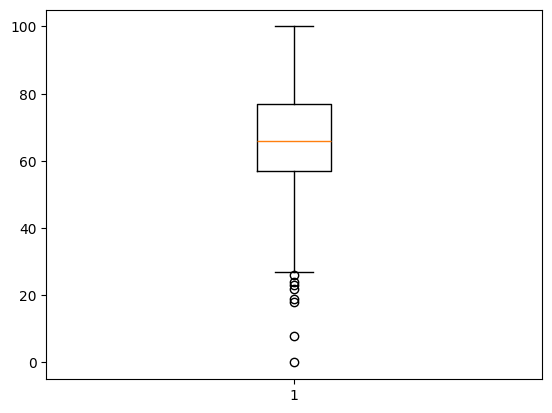

In [ ]:
Q1=df[x].quantile(0.25)
Q3=df[x].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = [x for x in df["math score"] if x < lower or x > upper]
print("Valeurs aberrantes :", outliers)
plt.boxplot(df["math score"])
plt.show()

Valeurs aberrantes : [17, 26, 28, 23, 24, 24]


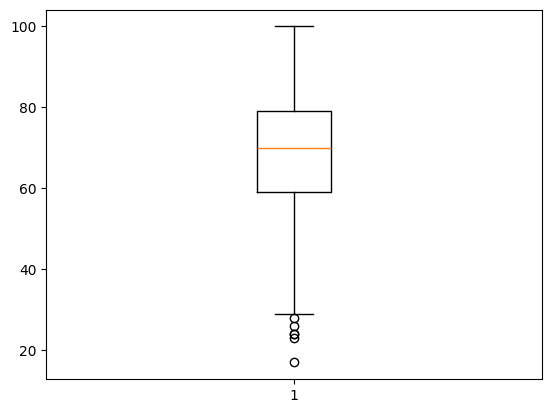

In [ ]:
Q1=df[x].quantile(0.25)
Q3=df[x].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = [x for x in df["reading score"] if x < lower or x > upper]
print("Valeurs aberrantes :", outliers)
plt.boxplot(df["reading score"])
plt.show()

Valeurs aberrantes : [28, 10, 22, 27, 19, 27, 15, 27, 23]


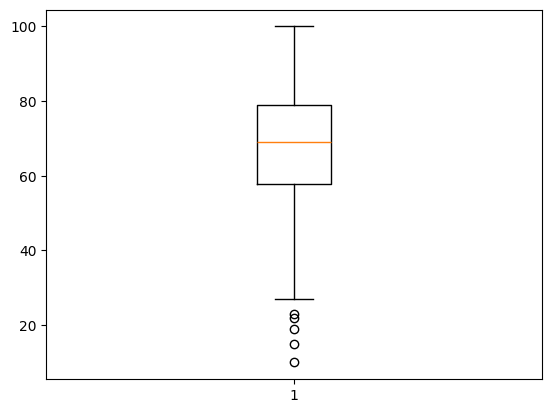

In [ ]:
Q1=df[x].quantile(0.25)
Q3=df[x].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = [x for x in df["writing score"] if x < lower or x > upper]
print("Valeurs aberrantes :", outliers)
plt.boxplot(df["writing score"])
plt.show()

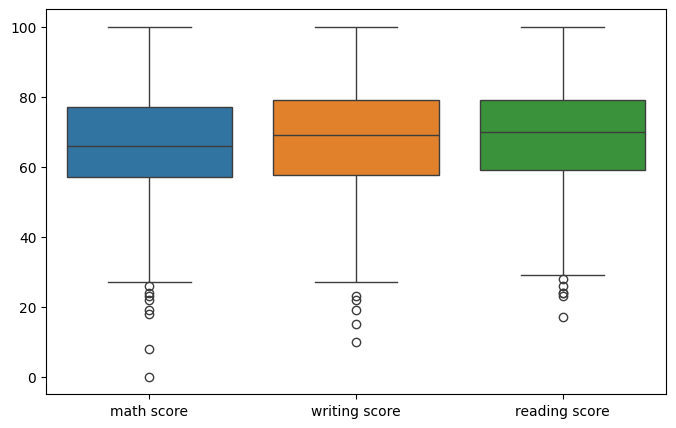

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(data=df[liste])
plt.show()

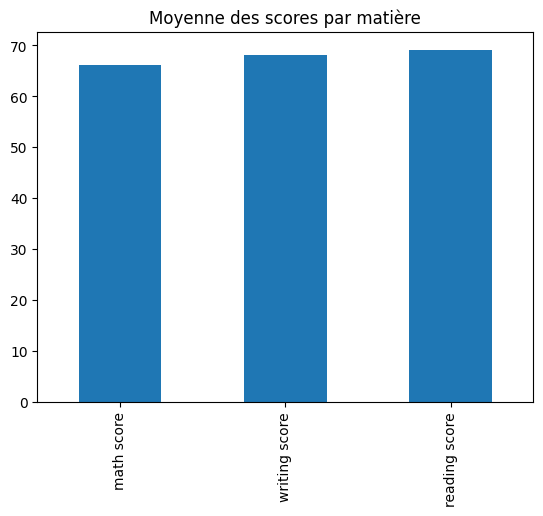

In [ ]:
moyenne = df[liste].mean()
moyenne.plot(kind='bar')
plt.title("Moyenne des scores par matière")
plt.show()

In [ ]:
corr = df[liste].corr()
corr

,math score,writing score,reading score
math score,1.000000,0.802642,0.817580
writing score,0.802642,1.000000,0.954598
reading score,0.817580,0.954598,1.000000


In [ ]:
df.groupby("gender")[liste].mean()

,math score,writing score,reading score
gender,,,
female,63.633205,72.467181,72.608108
male,68.728216,63.311203,65.473029


In [ ]:
df.groupby("lunch")[liste].mean()

,math score,writing score,reading score
lunch,,,
free/reduced,58.921127,63.022535,64.653521
standard,70.034109,70.823256,71.654264


In [ ]:
df.groupby("test preparation course")[liste].mean()

,math score,writing score,reading score
test preparation course,,,
completed,69.695531,74.418994,73.893855
none,64.077882,64.504673,66.534268


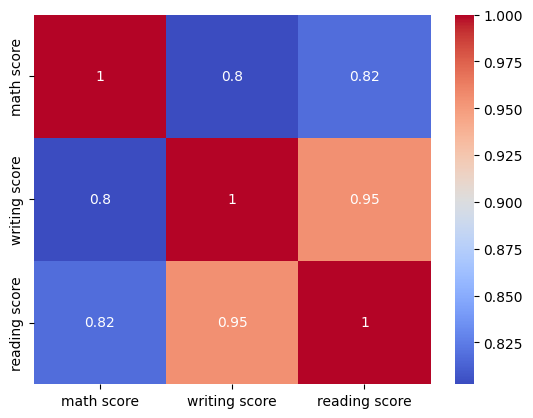

In [ ]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()